### “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import missingno as msn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor

1. 데이터 로드

In [38]:
data = pd.read_csv("machine.data.csv")
data
data.columns

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

2. 데이터 탐색

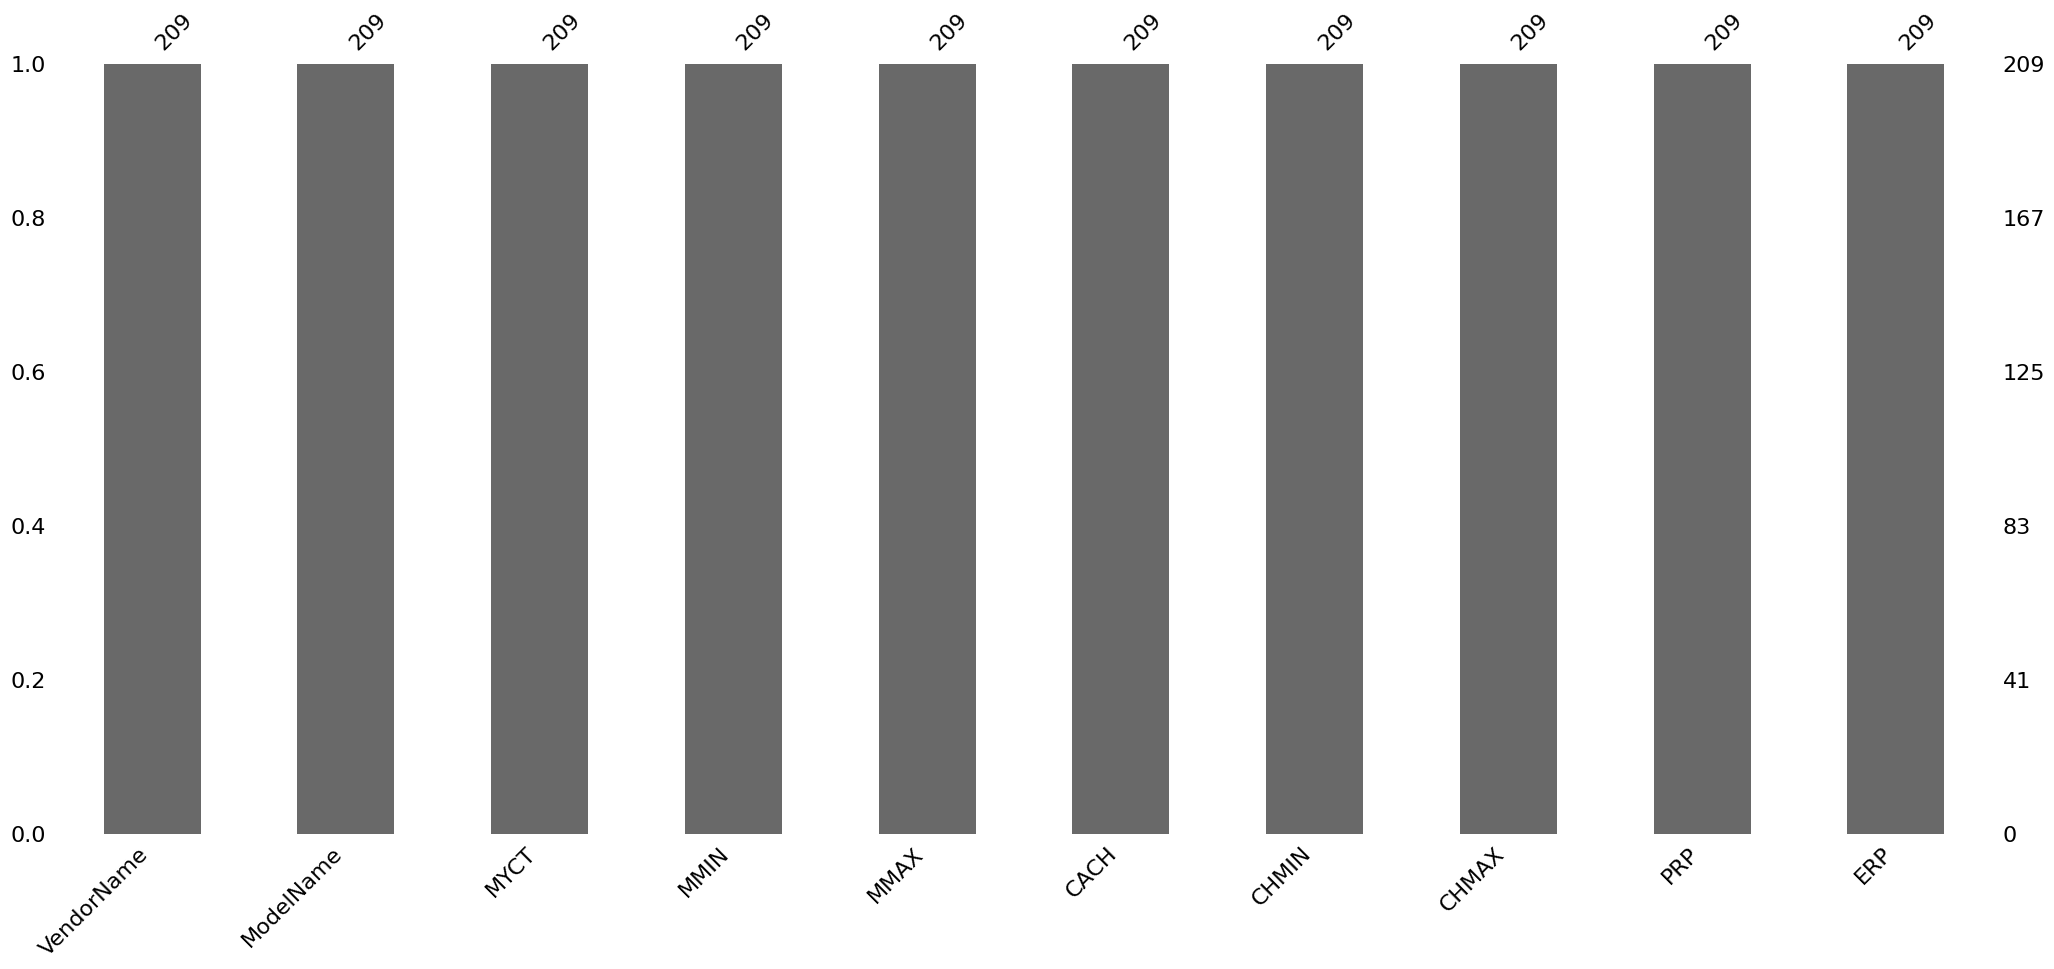

In [39]:
# 결측값 찾기
msn.bar(data)

# 결측치 처리
data.dropna(inplace = True)

3. feature engineering :  중요 특징 추출
* garbage-in Garbage-out
  * 특성의 수가 증가하는 만큼의 큰 성능 향상은 이루어지지 않는다.
  * 쓸모없는 데이터가 입력으로 들어가면 쓸모없는 결과만 나올뿐 의미

 상관도가 높은 특징을 기반으로 최적의 모형 찾기
  * 피처 선택: 속성 변수 들 중에서 어떤 변수들을 잘 조합해야 좋은 예측을 할 수 있을까
    * 상관도가(기여도)가 높은 유의한 속성 변수부터 하나씩 추가하는 방법

1) “PRP” 변수 탐색

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64


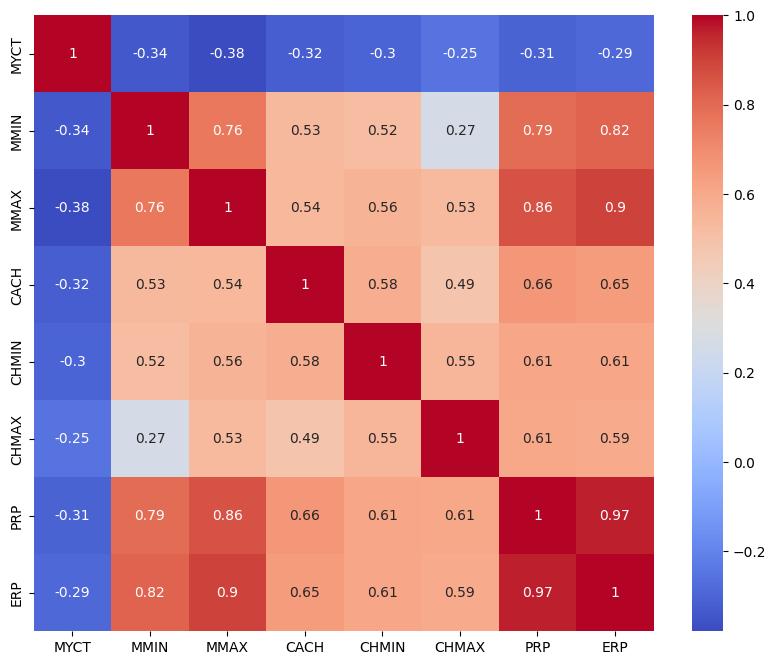

In [40]:
# 데이터셋 로드
column_names = [
    "VendorName", "ModelName", "MYCT", "MMIN", "MMAX", 
    "CACH", "CHMIN", "CHMAX", "PRP", "ERP"
]

# 전처리: 비수치형 컬럼 제거
data = data.drop(columns=['VendorName', 'ModelName'])

# 결측값 확인
print(data.isnull().sum())

# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 전처리된 데이터 저장
data.to_csv('preprocessed_machine_data.csv', index=False)

2. X, y 설정

In [48]:
# 특징(feature) 선택 및 타겟 설정
X = data.drop(columns=['PRP'])
y = data['PRP']

# 데이터 분할 (훈련 데이터셋과 테스트 데이터셋으로 나눔)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# 다중 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# 훈련 데이터에 대한 예측 및 평가
y_train_pred = model.predict(X_train)
print('훈련 데이터 평가:')
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('r2', r2_score(y_train, y_train_pred))

훈련 데이터 평가:
MSE: 1529.020470551296
MAE: 23.232255784639325
r2 0.9204648044109383


In [51]:
# 테스트 데이터에 대한 예측 및 평가
y_test_pred = model.predict(X_test)
print('테스트 데이터 평가:')
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('r2:', r2_score(y_test, y_test_pred))

테스트 데이터 평가:
MSE: 2370.096374775837
MAE: 31.406218675535623
r2: 0.9534424890368542


In [52]:
# 교차 검증 (Cross Validation)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('교차 검증 R^2 Score 평균:', np.mean(cv_scores))

교차 검증 R^2 Score 평균: 0.847991461557509


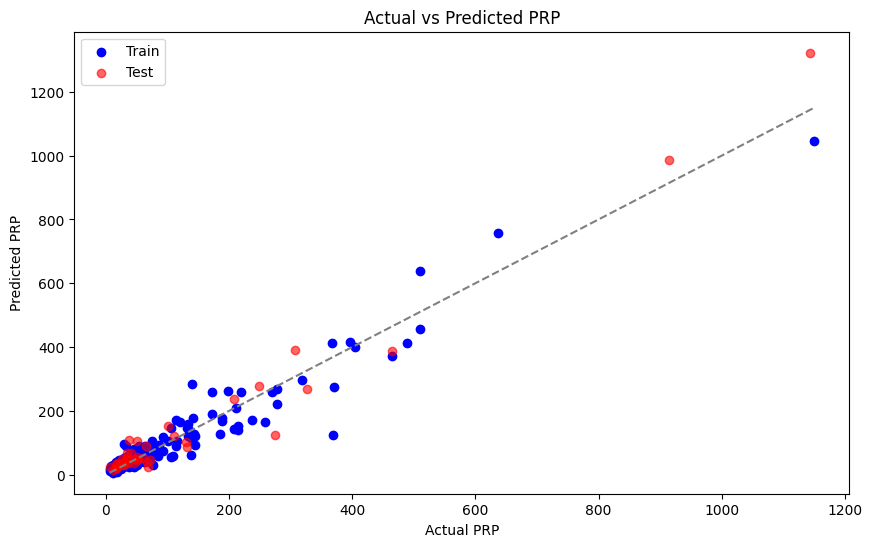

In [53]:
plt.figure(figsize=(10, 6))

# 훈련 데이터
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
# 테스트 데이터
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6, label='Test')

plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='gray')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.legend()
plt.show()


## 개선 모델